In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-stock-market-trend-analysis-and-visuals/prices-split-adjusted.csv
/kaggle/input/new-york-stock-market-trend-analysis-and-visuals/fundamentals.csv
/kaggle/input/new-york-stock-market-trend-analysis-and-visuals/prices.csv
/kaggle/input/new-york-stock-market-trend-analysis-and-visuals/securities.csv


README FILE

Key Metrics & Financial Analysis:
Computed daily and cumulative stock returns to evaluate market performance, analyzed volatility to assess investment risk, and performed sector-wise KPI analysis to compare returns, trading activity, and stability across NYSE sectors.


In [6]:
import pandas as pd

# CHANGE this only if your folder name is different
BASE_PATH = '/kaggle/input/new-york-stock-market-trend-analysis-and-visuals'

prices = pd.read_csv(f'{BASE_PATH}/prices-split-adjusted.csv')
securities = pd.read_csv(f'{BASE_PATH}/securities.csv')
fundamentals = pd.read_csv(f'{BASE_PATH}/fundamentals.csv')


In [8]:
# Convert date column
prices['date'] = pd.to_datetime(prices['date'])

# Merge sector info
prices = prices.merge(
    securities[['Ticker symbol', 'GICS Sector']],
    left_on='symbol',
    right_on='Ticker symbol',
    how='left'
)

# Sort for time-series calculations
prices = prices.sort_values(['symbol', 'date'])


In [9]:
prices.head()
prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             851264 non-null  datetime64[ns]
 1   symbol           851264 non-null  object        
 2   open             851264 non-null  float64       
 3   close            851264 non-null  float64       
 4   low              851264 non-null  float64       
 5   high             851264 non-null  float64       
 6   volume           851264 non-null  float64       
 7   Ticker symbol_x  851264 non-null  object        
 8   GICS Sector_x    851264 non-null  object        
 9   Ticker symbol_y  851264 non-null  object        
 10  GICS Sector_y    851264 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 71.4+ MB


In [10]:
# Convert date to datetime
prices['date'] = pd.to_datetime(prices['date'])

# Merge sector information
prices = prices.merge(
    securities[['Ticker symbol', 'GICS Sector']],
    left_on='symbol',
    right_on='Ticker symbol',
    how='left'
)

# Sort values for time-series calculations
prices = prices.sort_values(['symbol', 'date'])

prices.head()


,date,symbol,open,close,low,high,volume,Ticker symbol_x,GICS Sector_x,Ticker symbol_y,GICS Sector_y,Ticker symbol,GICS Sector
0,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,A,Health Care,A,Health Care,A,Health Care
1,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,A,Health Care,A,Health Care,A,Health Care
2,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,A,Health Care,A,Health Care,A,Health Care
3,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,A,Health Care,A,Health Care,A,Health Care
4,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,A,Health Care,A,Health Care,A,Health Care


In [11]:
prices['daily_return'] = prices.groupby('symbol')['close'].pct_change()


In [12]:
prices['cumulative_return'] = (
    (1 + prices['daily_return'])
    .groupby(prices['symbol'])
    .cumprod() - 1
)


In [13]:
volatility = (
    prices.groupby('symbol')['daily_return']
    .std()
    .reset_index()
    .rename(columns={'daily_return': 'volatility'})
)

volatility.head()


,symbol,volatility
0,A,0.018760
1,AAL,0.030713
2,AAP,0.017214
3,AAPL,0.016518
4,ABBV,0.017299


In [14]:
avg_volume = (
    prices.groupby('symbol')['volume']
    .mean()
    .reset_index()
    .rename(columns={'volume': 'avg_volume'})
)

avg_volume.head()


,symbol,avg_volume
0,A,3.927589e+06
1,AAL,9.354038e+06
2,AAP,1.022026e+06
3,AAPL,9.422578e+07
4,ABBV,8.470789e+06


In [15]:
sector_kpis = (
    prices.groupby('GICS Sector')
    .agg(
        avg_daily_return=('daily_return', 'mean'),
        volatility=('daily_return', 'std'),
        avg_volume=('volume', 'mean')
    )
    .reset_index()
)

sector_kpis


,GICS Sector,avg_daily_return,volatility,avg_volume
0,Consumer Discretionary,0.000681,0.018912,4.509139e+06
1,Consumer Staples,0.000570,0.013198,4.507772e+06
2,Energy,0.000376,0.023063,5.918965e+06
3,Financials,0.000571,0.017361,7.749111e+06
4,Health Care,0.000707,0.018691,4.069756e+06
5,Industrials,0.000652,0.018181,3.534210e+06
6,Information Technology,0.000656,0.019497,1.035927e+07
7,Materials,0.000506,0.018570,3.747326e+06
8,Real Estate,0.000542,0.015851,2.073531e+06
9,Telecommunications Services,0.000215,0.017813,1.378897e+07


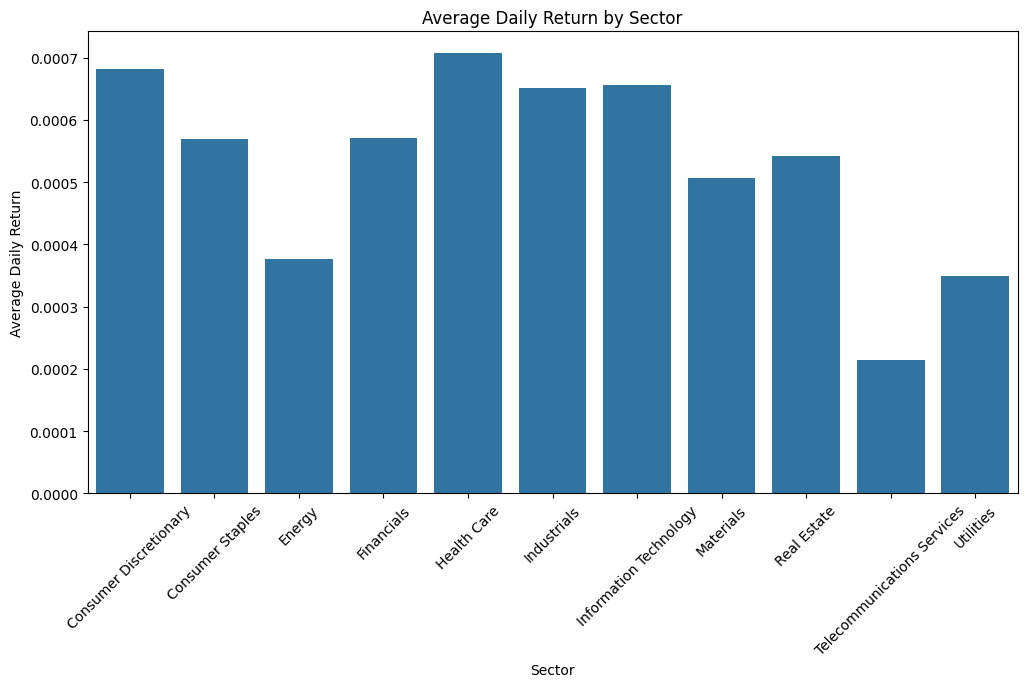

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=sector_kpis,
    x='GICS Sector',
    y='avg_daily_return'
)
plt.xticks(rotation=45)
plt.title('Average Daily Return by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Daily Return')
plt.show()


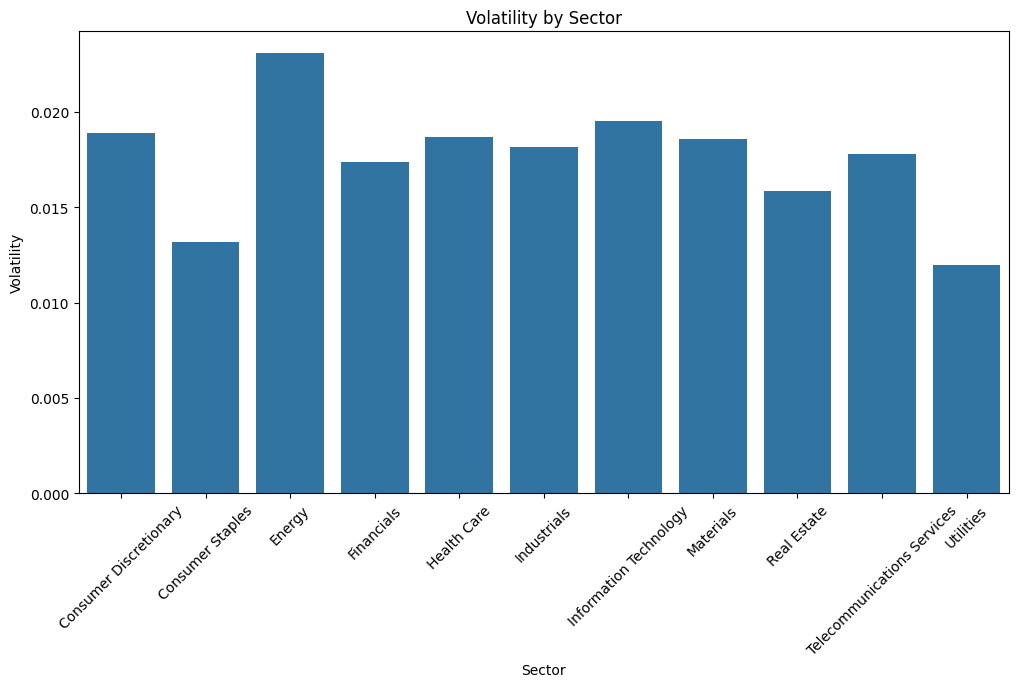

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=sector_kpis,
    x='GICS Sector',
    y='volatility'
)
plt.xticks(rotation=45)
plt.title('Volatility by Sector')
plt.xlabel('Sector')
plt.ylabel('Volatility')
plt.show()


The analysis shows clear differences in risk and performance across sectors. Certain sectors demonstrate higher average returns with moderate volatility, making them attractive for growth-focused investors, while others show lower volatility, indicating stable performance suitable for risk-averse strategies

**Performed financial KPI analysis on NYSE stock data, including daily returns, cumulative performance, volatility, and sector-wise comparisons to evaluate market trends and risk patterns**
